In [29]:
from bs4 import BeautifulSoup as bs
import requests
from urllib.request import urlopen
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


Populating the interactive namespace from numpy and matplotlib


/Users/turki/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
url_list=[]  # for loop to sava a list of carvago urls
for i in range (2, 300):
    url=f'https://carvago.com/cars?page={i}'
    url_list.append(url)
url_list

In [ ]:
cars=[]
for url in url_list:
    
    response = requests.get(url)  # using requests on the saved url to reterive the car informations needed
    page = response.text
    ll = bs(page,'lxml')
    for i in range(20):
        get=[]
        get.append(ll.find_all('div',class_='CarCard__ContentBlock-sc-tt14yf-5 bQcYga')[i].find('h6').text)
        get.append(ll.find_all('div',class_='CarCard__ContentBlock-sc-tt14yf-5 bQcYga')[i].find(class_='CarCardPrice__Price-sc-azck0q-1 dNoioA').text[0:][:-2])
        for m in range(5):
            get.append(ll.find_all('div',class_='CarCard__ContentBlock-sc-tt14yf-5 bQcYga')[i].find_all('div',class_='Label__WrapperStatic-sc-1u9cupe-0 kAwnFO')[m].text.strip())
        cars.append(get)

In [ ]:
df=pd.DataFrame(cars) # placing our informations into datafram 
df

In [ ]:
df.duplicated().sum() #finding # of duplicate

In [ ]:
df.info()

In [ ]:
df.drop_duplicates(inplace=True) # dropping duplicated values
df.info()

In [ ]:
df.rename(columns={0:"Car_Name",1: "Price_€",2:"km_Driven",3:"First_Registration",4:"Power_kW",5:"Transmission",6:"Fuel"},inplace=True)
df.head()

In [ ]:
# cleaning the dataset by placing null values to undersired entries 

df.Transmission=np.where(~df.Transmission.isin(['Automatic','Manual']), np.nan,df.Transmission)
df.Fuel=np.where(~df.Fuel.isin(['Petrol','Diesel','Electric','Hybrid']), np.nan,df.Fuel)
df.Power_kW=np.where(df.Power_kW.isin(['Automatic','Manual']), np.nan,df.Power_kW)
df.info()

In [ ]:
df10=df

In [ ]:
# creating dummy variables 
dm=pd.get_dummies(df10['Transmission'])
dm.head()
         

In [ ]:
# adding dummy variables
df10=pd.concat([df10,dm],axis=1)
df10.head()

In [ ]:
dm1=pd.get_dummies(df10['Fuel'])
dm1.head()
          

In [ ]:
df10=pd.concat([df10,dm1],axis=1)
df10.head()

In [ ]:
df1.isnull().sum() #Finding sum of null values 

In [2]:
with open('my_dataframelast900.pickle','rb') as read_file: #Pickling my data for later use
    new_df = pickle.load(read_file)
    

In [3]:
dfr=new_df

In [4]:
# cleaning by reeplacing non numeric values 

dfr['km_Driven'] = dfr['km_Driven'].replace(r'km', '', regex=True) 
dfr.head()

,Car_Name,Price_€,km_Driven,First_Registration,Power_kW,Transmission,Fuel,Automatic,Manual,Diesel,Electric,Hybrid,Petrol
0,Volkswagen Caddy 2.0 TDI 75 kW,10 699,134 572,2/2018,75 kW,Manual,Diesel,0,1,1,0,0,0
1,BMW 120 141 kW,44 449,5 413,4/2021,141 kW,Automatic,Petrol,1,0,0,0,0,1
2,BMW 640 250 kW,52 899,27 656,7/2019,250 kW,Automatic,Petrol,1,0,0,0,0,1
3,Renault ZOE 70 kW without battery,9 599,30 200,12/2018,70 kW,Automatic,Electric,1,0,0,1,0,0
4,Mercedes-Benz E 63 AMG E T S 4Matic MCT 430 kW,47 849,25 000,7/2014,430 kW,Automatic,Petrol,1,0,0,0,0,1


In [10]:
# cleaning by reeplacing non numeric values 
dfr['Power_kW'] = dfr['Power_kW'].replace(r'kW', '', regex=True)
dfr.head()

,Car_Name,Price_€,km_Driven,First_Registration,Power_kW,Transmission,Fuel,Automatic,Manual,Diesel,Electric,Hybrid,Petrol
0,Volkswagen Caddy 2.0 TDI 75 kW,10 699,134 572,2/2018,75,Manual,Diesel,0,1,1,0,0,0
1,BMW 120 141 kW,44 449,5 413,4/2021,141,Automatic,Petrol,1,0,0,0,0,1
2,BMW 640 250 kW,52 899,27 656,7/2019,250,Automatic,Petrol,1,0,0,0,0,1
3,Renault ZOE 70 kW without battery,9 599,30 200,12/2018,70,Automatic,Electric,1,0,0,1,0,0
4,Mercedes-Benz E 63 AMG E T S 4Matic MCT 430 kW,47 849,25 000,7/2014,430,Automatic,Petrol,1,0,0,0,0,1


In [12]:
with open('turkidata900.pickle', 'wb') as to_write:  #Pickling my data for later use
    pickle.dump(dfr, to_write)

In [13]:
df=dfr

In [94]:
df.dropna(inplace=True)

In [102]:
df.drop(['Transmission','Fuel'], axis=1, inplace=True)

In [103]:
df

,Car_Name,Price_€,km_Driven,First_Registration,Power_kW,Automatic,Manual,Diesel,Electric,Hybrid,Petrol
0,Volkswagen Caddy 2.0 TDI 75 kW,10699,134572,2/2018,75,0,1,1,0,0,0
1,BMW 120 141 kW,44449,5413,4/2021,141,1,0,0,0,0,1
2,BMW 640 250 kW,52899,27656,7/2019,250,1,0,0,0,0,1
3,Renault ZOE 70 kW without battery,9599,30200,12/2018,70,1,0,0,1,0,0
4,Mercedes-Benz E 63 AMG E T S 4Matic MCT 430 kW,47849,25000,7/2014,430,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5955,Renault Kadjar TCe 140 GPF 103 kW,21399,7990,9/2020,103,0,1,0,0,0,1
5956,Mazda CX-5 165 121 kW,28499,4000,3/2021,121,0,1,0,0,0,1
5957,Volkswagen T-Roc 1.5 TSI 110 kW,29599,500,11/2020,110,1,0,0,0,0,1
5958,Kia Optima 2.0 GDI Plug-In Hybrid Spirit 113 kW,31699,10500,9/2019,113,1,0,0,0,1,0


In [105]:
with open('mylastandlastdataframe.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [106]:
with open('mylastandlastdataframe.pickle','rb') as read_file:
    df19 = pickle.load(read_file)

In [33]:
 # converting data type to integer
df['Power_kW']=pd.to_numeric(df['Power_kW'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5562 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Name            5562 non-null   object
 1   Price_€             5562 non-null   object
 2   km_Driven           5562 non-null   object
 3   First_Registration  5562 non-null   object
 4   Power_kW            5562 non-null   int64 
 5   Transmission        5562 non-null   object
 6   Fuel                5562 non-null   object
 7   Automatic           5562 non-null   uint8 
 8   Manual              5562 non-null   uint8 
 9   Diesel              5562 non-null   uint8 
 10  Electric            5562 non-null   uint8 
 11  Hybrid              5562 non-null   uint8 
 12  Petrol              5562 non-null   uint8 
dtypes: int64(1), object(6), uint8(6)
memory usage: 380.2+ KB


In [107]:
df19

,Car_Name,Price_€,km_Driven,First_Registration,Power_kW,Automatic,Manual,Diesel,Electric,Hybrid,Petrol
0,Volkswagen Caddy 2.0 TDI 75 kW,10699,134572,2/2018,75,0,1,1,0,0,0
1,BMW 120 141 kW,44449,5413,4/2021,141,1,0,0,0,0,1
2,BMW 640 250 kW,52899,27656,7/2019,250,1,0,0,0,0,1
3,Renault ZOE 70 kW without battery,9599,30200,12/2018,70,1,0,0,1,0,0
4,Mercedes-Benz E 63 AMG E T S 4Matic MCT 430 kW,47849,25000,7/2014,430,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5955,Renault Kadjar TCe 140 GPF 103 kW,21399,7990,9/2020,103,0,1,0,0,0,1
5956,Mazda CX-5 165 121 kW,28499,4000,3/2021,121,0,1,0,0,0,1
5957,Volkswagen T-Roc 1.5 TSI 110 kW,29599,500,11/2020,110,1,0,0,0,0,1
5958,Kia Optima 2.0 GDI Plug-In Hybrid Spirit 113 kW,31699,10500,9/2019,113,1,0,0,0,1,0


In [9]:
df1=df

In [131]:
df2=df

In [132]:
df2.drop(['Manual'], axis=1, inplace=True)

In [40]:
 # converting data type to integer and removing spaces between numbers



df1['Price_€'] = df1['Price_€'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Price_€'] = pd.to_numeric(df1['Price_€'])

<ipython-input-40-485acee51227>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Price_€'] = df1['Price_€'].astype(str).str.replace('\s+', '').replace('nan', np.nan)


In [44]:
 # converting data type to integer and removing spaces between numbers


df1['km_Driven'] = df1['km_Driven'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['km_Driven'] = pd.to_numeric(df1['km_Driven'])

<ipython-input-44-db764fe219fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['km_Driven'] = df1['km_Driven'].astype(str).str.replace('\s+', '').replace('nan', np.nan)


In [64]:
 # converting data type to integer and removing spaces between numbers

df1['Automatic'] = df1['Automatic'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Automatic'] = pd.to_numeric(df1['Automatic'])
df1['Diesel'] = df1['Diesel'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Diesel'] = pd.to_numeric(df1['Diesel'])
df1['Hybrid'] = df1['Hybrid'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Hybrid'] = pd.to_numeric(df1['Hybrid'])
df1['Electric'] = df1['Electric'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Electric'] = pd.to_numeric(df1['Electric'])
df1['Petrol'] = df1['Petrol'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Petrol'] = pd.to_numeric(df1['Petrol'])
df1['Manual'] = df1['Manual'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
df1['Manual'] = pd.to_numeric(df1['Manual'])

<ipython-input-64-5e9d1c0a090d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Automatic'] = df1['Automatic'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
<ipython-input-64-5e9d1c0a090d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Diesel'] = df1['Diesel'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
<ipython-input-64-5e9d1c0a090d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Hybrid'] = df1['Hybrid'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
<ipython-input-64-5e9d1c0a090d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Electric'] = df1['Electric'].astype(str).str.replace('\s+', '').replace('nan', np.nan)
<ipython-input-64-5e9d1c0a090d>:9: FutureWarning: The default value of regex will change from True to False in a f

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5562 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Name            5562 non-null   object
 1   Price_€             5562 non-null   int64 
 2   km_Driven           5562 non-null   int64 
 3   First_Registration  5562 non-null   object
 4   Power_kW            5562 non-null   int64 
 5   Transmission        5562 non-null   object
 6   Fuel                5562 non-null   object
 7   Automatic           5562 non-null   int64 
 8   Manual              5562 non-null   int64 
 9   Diesel              5562 non-null   int64 
 10  Electric            5562 non-null   int64 
 11  Hybrid              5562 non-null   int64 
 12  Petrol              5562 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 608.3+ KB


In [27]:
pd.set_option("display.max_rows", None) # showing max rows

In [135]:
round(df1.corr(),2) # Finding correlations between values 

,Price_€,km_Driven,Power_kW,Automatic,Diesel,Electric,Hybrid,Petrol
Price_€,1.00,-0.23,0.74,0.41,0.18,-0.22,0.07,-0.08
km_Driven,-0.23,1.00,0.12,-0.12,0.21,-0.11,-0.14,-0.08
Power_kW,0.74,0.12,1.00,0.36,0.04,-0.20,0.04,0.06
Automatic,0.41,-0.12,0.36,1.00,0.07,0.15,0.08,-0.21
Diesel,0.18,0.21,0.04,0.07,1.00,-0.32,-0.26,-0.70
Electric,-0.22,-0.11,-0.20,0.15,-0.32,1.00,-0.09,-0.25
Hybrid,0.07,-0.14,0.04,0.08,-0.26,-0.09,1.00,-0.20
Petrol,-0.08,-0.08,0.06,-0.21,-0.70,-0.25,-0.20,1.00


<AxesSubplot:>

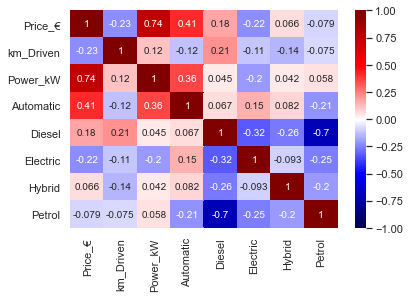

In [134]:
sns.heatmap(df1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# End of Turki Code

In [5]:
with open('mylastandlastdataframe.pickle', 'rb') as to_read:
    x=pickle.load(to_read)

In [7]:
Car_company = df["Car_Name"].str.split(" ", n = 1, expand = True) #Adding a column about the names of the cars companies
df['Car_Company'] = Car_company[0]

In [32]:
df

,index,Car_Name,Price_€,km_Driven,First_Registration,Power_kW,Automatic,Manual,Diesel,Electric,Hybrid,Petrol,Car_Company
0,0,Volkswagen Caddy 2.0 TDI 75 kW,10699.0,134572,2/2018,75,0,1,1,0,0,0,Volkswagen
1,1,BMW 120 141 kW,44449.0,5413,4/2021,141,1,0,0,0,0,1,BMW
2,2,BMW 640 250 kW,52899.0,27656,7/2019,250,1,0,0,0,0,1,BMW
3,3,Renault ZOE 70 kW without battery,9599.0,30200,12/2018,70,1,0,0,1,0,0,Renault
4,4,Mercedes-Benz E 63 AMG E T S 4Matic MCT 430 kW,47849.0,25000,7/2014,430,1,0,0,0,0,1,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,5955,Renault Kadjar TCe 140 GPF 103 kW,21399.0,7990,9/2020,103,0,1,0,0,0,1,Renault
5558,5956,Mazda CX-5 165 121 kW,28499.0,4000,3/2021,121,0,1,0,0,0,1,Mazda
5559,5957,Volkswagen T-Roc 1.5 TSI 110 kW,29599.0,500,11/2020,110,1,0,0,0,0,1,Volkswagen
5560,5958,Kia Optima 2.0 GDI Plug-In Hybrid Spirit 113 kW,31699.0,10500,9/2019,113,1,0,0,0,1,0,Kia


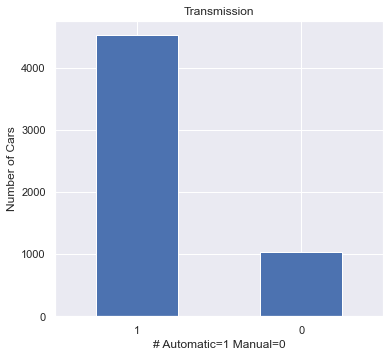

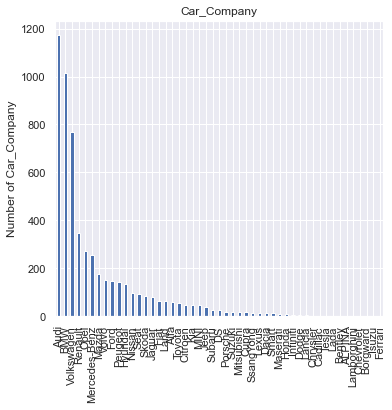

In [28]:
Transmission = ['Automatic'] #The barchart clarifies that the number of cars for every type of transmission
                                             
k=0
plt.figure(figsize=(20,25))
for i in Transmission:    
    k=k+1
    plt.subplot(4, 3,k)    
    df1[i].value_counts().plot(kind='bar');
    plt.title('Transmission')
    plt.xticks(rotation=0)
    plt.ylabel('Number of Cars')
    plt.xlabel('# Automatic=1 Manual=0')
    plt.title('Transmission')
    
Car_Company = ['Car_Company'] #The barchart clarifies that the number of cars for every cars company 
k=0
plt.figure(figsize=(20,25))
for i in Car_Company:    
    k=k+1
    plt.subplot(4, 3,k)    
    df1[i].value_counts().plot(kind='bar');
    plt.title('Car_Company')
    plt.ylabel('Number of Car_Company')
    plt.xticks(rotation=90)

In [12]:
#simple cleaning
df = df.replace('?', np.NaN).dropna().reset_index()
df['Price_€'] = df['Price_€'].astype(float)

cars = df.select_dtypes(exclude=['object']).copy()


cars.head(3)

,index,Price_€,km_Driven,Power_kW,Automatic,Manual,Diesel,Electric,Hybrid,Petrol
0,0,10699.0,134572,75,0,1,1,0,0,0
1,1,44449.0,5413,141,1,0,0,0,0,1
2,2,52899.0,27656,250,1,0,0,0,0,1


In [13]:

X, y = cars.drop('Price_€',axis=1), cars['Price_€']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [17]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [18]:
lm.fit(X,y)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')

Linear Regression train R^2: 0.698


In [19]:
lm_reg.fit(X, y)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train, y_train):.3f}')

Ridge Regression train R^2: 0.698


In [20]:
lm_poly.fit(X, y)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train, y_train):.3f}')

Degree 2 polynomial regression train R^2: 0.698


In [21]:

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.740
Ridge Regression val R^2: 0.740
Degree 2 polynomial regression val R^2: 0.757


In [22]:
lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test, y_test):.3f}')

Degree 2 polynomial regression test R^2: 0.705
